### Streaming

Methods: .stram() and astream()

- these methods are sync and async methods for streaming back results.

Additional parameters in steaming mode in graph state

-**value** : This streams the full state of the graph after each node is called.

-**update** : This streams updates to the state of the grpah after eash node is called.

d:\AgenticAI\.venv\Scripts\python.exe
True


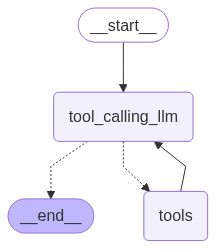

In [ ]:
from langchain_tavily import TavilySearch
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from IPython.display import Image, display



class State(TypedDict):
    messages:Annotated[list,add_messages] ## add_message is acting as reducer

graph_builder=StateGraph(State)
graph_builder

import os 
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

import os
os.environ["GROQ_API_KEY"] = "GROQ_API_KEY"
llm = ChatGroq(model="llama3-8b-8192")
llm

llm = ChatGroq(model="llama3-8b-8192", api_key=os.environ["GROQ_API_KEY"])


tool  = TavilySearch(max_search=2)
tool.invoke("What is langgraph")

import sys
print(sys.executable)

import pkg_resources
installed_packages = {pkg.key for pkg in pkg_resources.working_set}
print('langchain-tavily' in installed_packages)


##Custom function
def multiply(a:int,b:int)->int:
    """Multiply a and b

    args:
         a(int): first int
         b(int): second int
        
    Returns:
        int:output int
    
    """

    return a*b




tools=[tool,multiply]
llm_with_tool=llm.bind_tools(tools)
llm_with_tool

### Stategraph
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

## Node Defination
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tool.invoke(state["messages"])]}

## create a graph
builder= StateGraph(State)
builder.add_node("tool_calling_llm",tool_calling_llm)
builder.add_node("tools",ToolNode(tools))

## add edges 
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # if the latest messgaes (result) from assistant is a tool call ->tools_condition routes to tools
    # if the latest messgaes (result) from assistant is a not tool call -> tools_condition routes to END
    tools_condition
)
builder.add_edge("tools","tool_calling_llm")


##compile the graph
graph1 = builder.compile(checkpointer=memory)
display(Image(graph1.get_graph().draw_mermaid_png()))


In [ ]:
## create a thread 
config = {"configurable": {"thread_id":"3"}}
for chunk in graph1.stream({"messages": "hi my name is atul and I like cricket"}, config=config, stream_mode="updates"):
    print(chunk)


{'tool_calling_llm': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '971en78ba', 'function': {'arguments': '{"query":"cricket"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 2208, 'total_tokens': 2277, 'completion_time': 0.114763761, 'prompt_time': 0.252229161, 'queue_time': 0.273525446, 'total_time': 0.366992922}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a7bb1b4d-d91e-420f-8c00-6e1f72853d91-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'cricket'}, 'id': '971en78ba', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2208, 'output_tokens': 69, 'total_tokens': 2277})]}}
{'tools': {'messages': [ToolMessage(content='{"query": "cricket", "follow_up_questions": null, "answer": null, "images": [], "results": [{"title": "Cell phones and unlimited plans with no annual contract |

In [12]:
## create a thread 
config = {"configurable": {"thread_id":"3"}}
for chunk in graph1.stream({"messages": "hi my name is atul and I like cricket"}, config=config, stream_mode="values"):
    print(chunk)


{'messages': [HumanMessage(content='hi my name is atul and I like cricket', additional_kwargs={}, response_metadata={}, id='01c99fe4-ab32-4973-9255-09018d708a23'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '971en78ba', 'function': {'arguments': '{"query":"cricket"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 69, 'prompt_tokens': 2208, 'total_tokens': 2277, 'completion_time': 0.114763761, 'prompt_time': 0.252229161, 'queue_time': 0.273525446, 'total_time': 0.366992922}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a7bb1b4d-d91e-420f-8c00-6e1f72853d91-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'cricket'}, 'id': '971en78ba', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2208, 'output_tokens': 69, 'total_tokens': 2277}), ToolMessage(content='{"query": "cricket", "follow_up_questions": null, "answer

In [13]:
## create a thread 
config = {"configurable": {"thread_id":"4"}}
for chunk in graph1.stream({"messages": "hi my name is atul and I like cricket"}, config=config, stream_mode="updates"):
    print(chunk)


{'tool_calling_llm': {'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'wj102qpvn', 'function': {'arguments': '{"query":"cricket","search_depth":"advanced","time_range":null,"topic":"general"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 2208, 'total_tokens': 2299, 'completion_time': 0.144825004, 'prompt_time': 0.245083952, 'queue_time': 0.272752628, 'total_time': 0.389908956}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_2717d04279', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--46b13bfa-6fcb-4cee-adf1-28fb307bf9d9-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'cricket', 'search_depth': 'advanced', 'time_range': None, 'topic': 'general'}, 'id': 'wj102qpvn', 'type': 'tool_call'}], usage_metadata={'input_tokens': 2208, 'output_tokens': 91, 'total_tokens': 2299})]}}
{'tools': {'messages': [ToolMessage(content='{"query": "cricket", "follow_u

In [14]:
## create a thread 
config = {"configurable": {"thread_id":"4"}}
for chunk in graph1.stream({"messages": "hi my name is atul and I also like football"}, config=config, stream_mode="values"):
    print(chunk)


{'messages': [HumanMessage(content='hi my name is atul and I like cricket', additional_kwargs={}, response_metadata={}, id='a6a2f2fc-937f-4d73-8fdb-97bf99bb7964'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'wj102qpvn', 'function': {'arguments': '{"query":"cricket","search_depth":"advanced","time_range":null,"topic":"general"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 91, 'prompt_tokens': 2208, 'total_tokens': 2299, 'completion_time': 0.144825004, 'prompt_time': 0.245083952, 'queue_time': 0.272752628, 'total_time': 0.389908956}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_2717d04279', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--46b13bfa-6fcb-4cee-adf1-28fb307bf9d9-0', tool_calls=[{'name': 'tavily_search', 'args': {'query': 'cricket', 'search_depth': 'advanced', 'time_range': None, 'topic': 'general'}, 'id': 'wj102qpvn', 'type': 'tool_call'}], usage_metadata={'input_tokens':

In [18]:
import asyncio

async def run_graph():
    config = {"configurable": {"thread_id": "5"}}
    async for chunk in graph1.astream_events({"messages": "hi my name is atul and I also like football"}, config=config, version="v2"):
        print(chunk)

# Run it
await run_graph()


{'event': 'on_chain_start', 'data': {'input': {'messages': 'hi my name is atul and I also like football'}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'a8e29c83-5a8d-4188-a297-53bb533a598d', 'metadata': {'thread_id': '5'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='hi my name is atul and I also like football', additional_kwargs={}, response_metadata={}, id='a270b6b0-4c38-4c6a-a7ea-16506c2273ca')]}}, 'name': 'tool_calling_llm', 'tags': ['graph:step:1'], 'run_id': 'd1e985a2-7fb7-458c-9871-ee35a06091fe', 'metadata': {'thread_id': '5', 'langgraph_step': 1, 'langgraph_node': 'tool_calling_llm', 'langgraph_triggers': ('branch:to:tool_calling_llm',), 'langgraph_path': ('__pregel_pull', 'tool_calling_llm'), 'langgraph_checkpoint_ns': 'tool_calling_llm:5f57838c-cf1d-1eb5-36a8-302f5f6c0dd9'}, 'parent_ids': ['a8e29c83-5a8d-4188-a297-53bb533a598d']}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='hi my name 